

Batch Gradient Descent (BGD)




<Figure size 432x288 with 0 Axes>

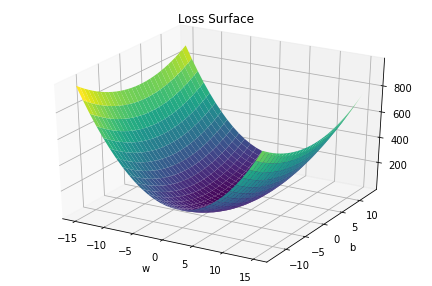

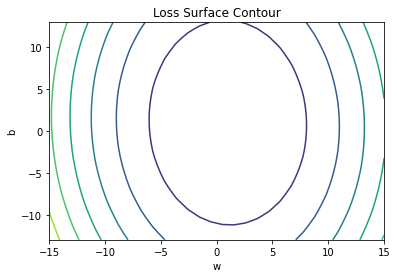

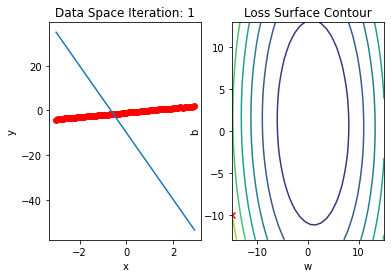

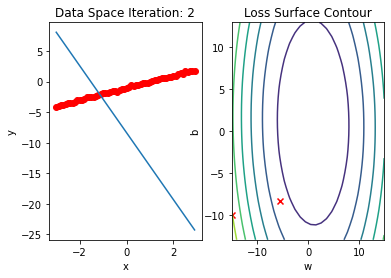

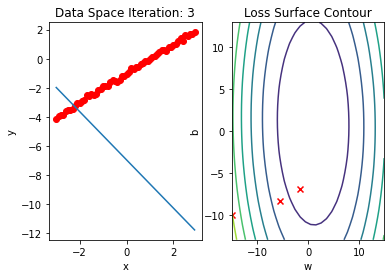

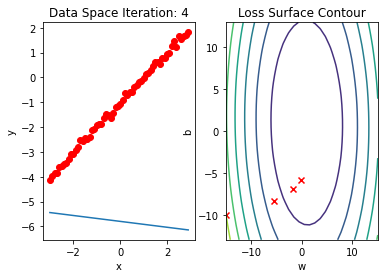

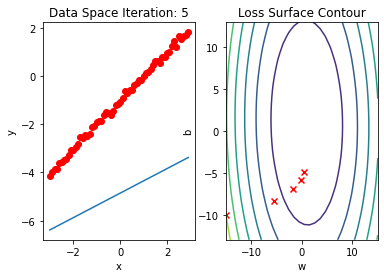

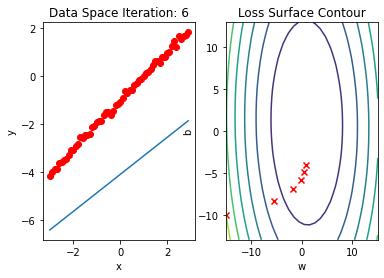

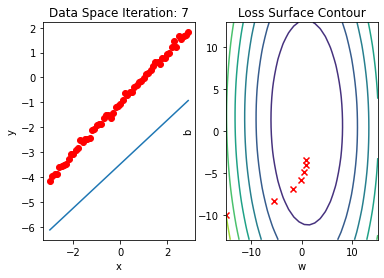

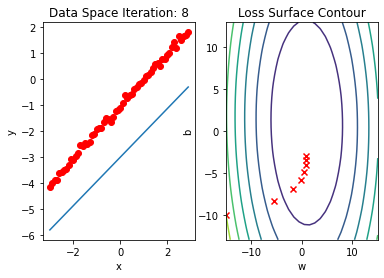

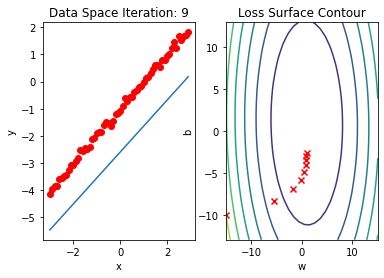

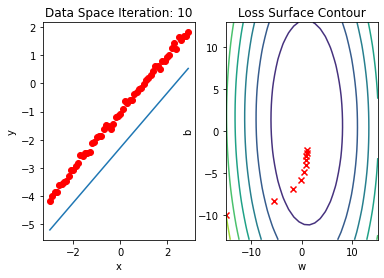



Stochastic Gradient Descent with 10 batch size




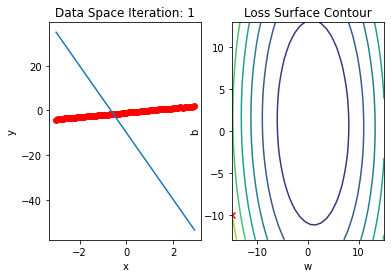

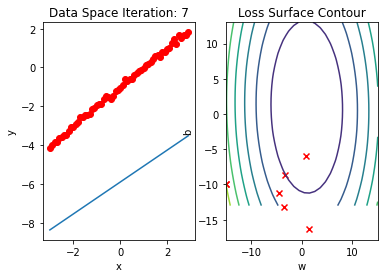

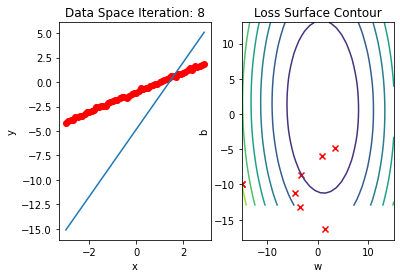

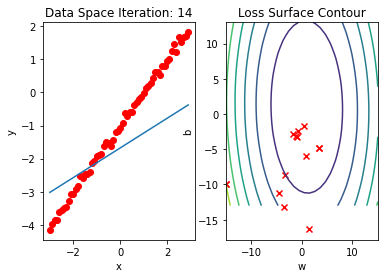

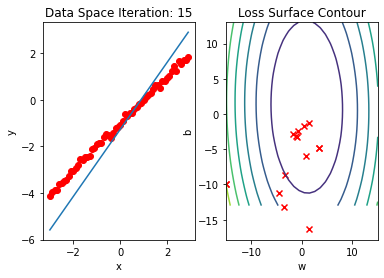

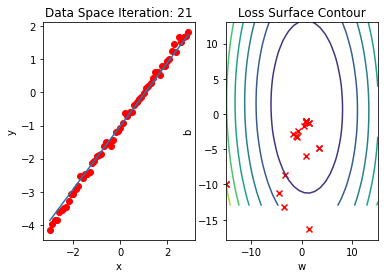

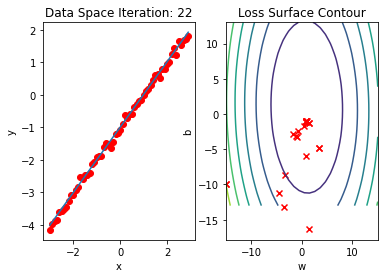

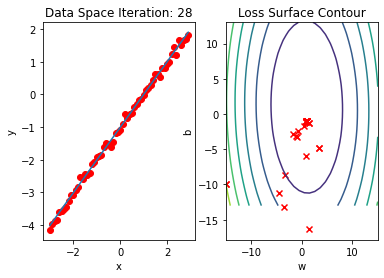

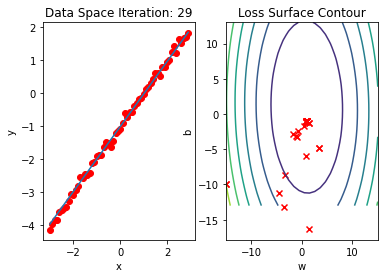

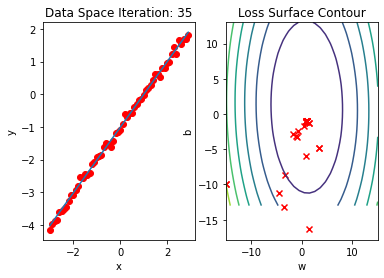

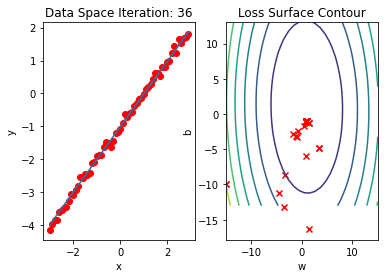

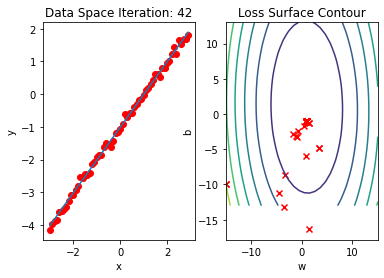

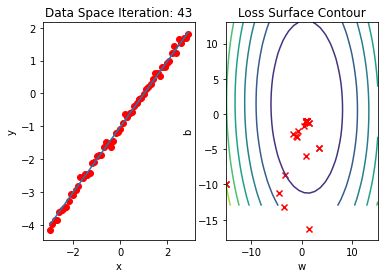

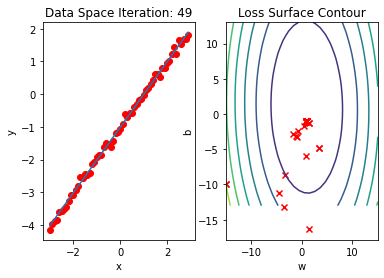

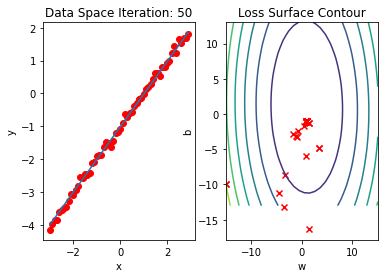

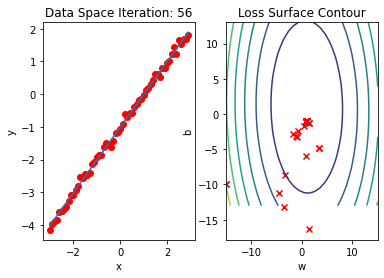

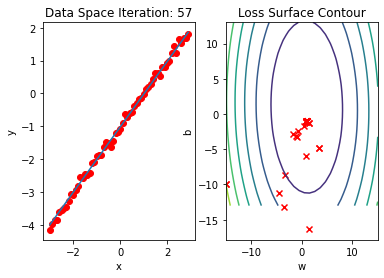

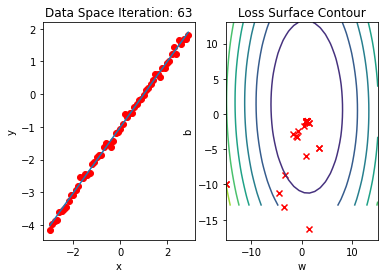

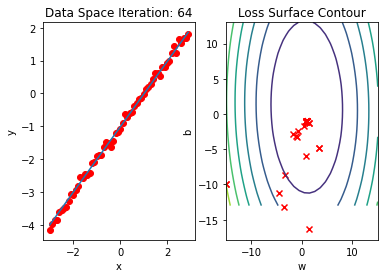

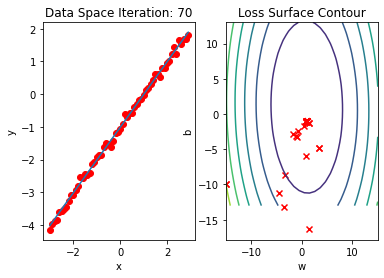



Mini-batch Gradient Descent with 15 batch size




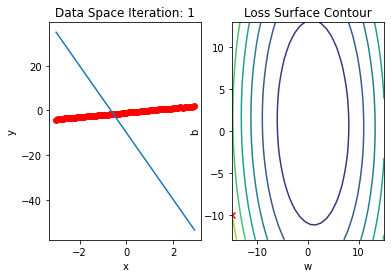

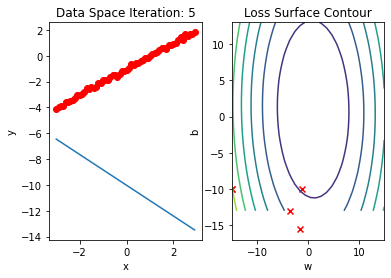

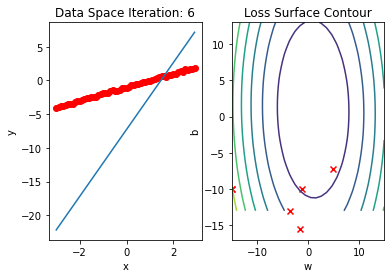

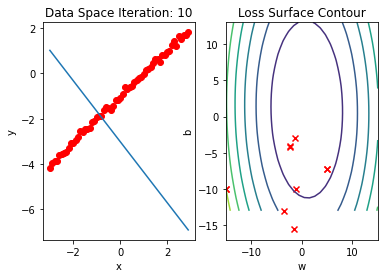

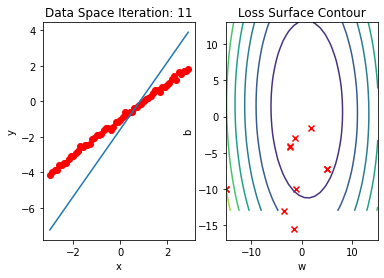

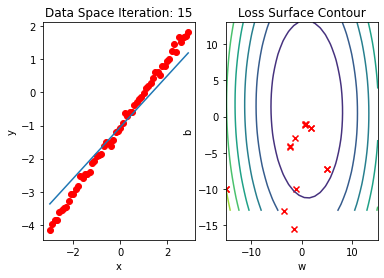

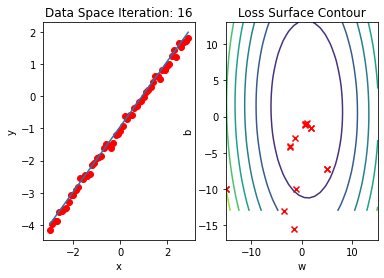

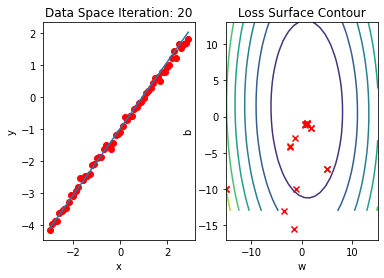

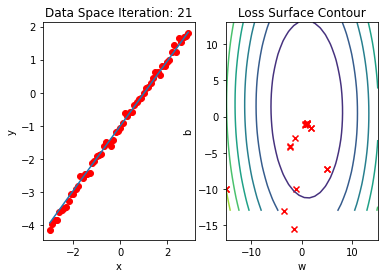

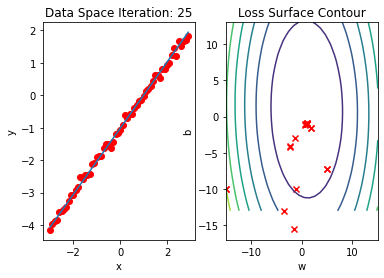

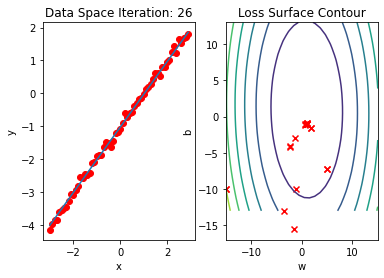

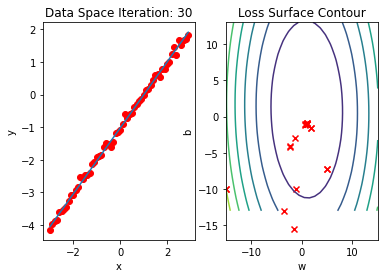

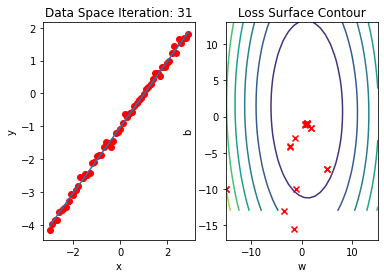

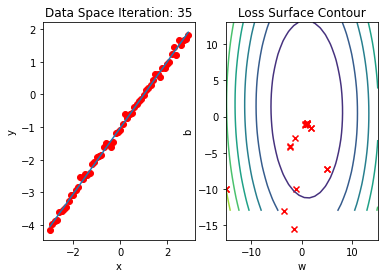

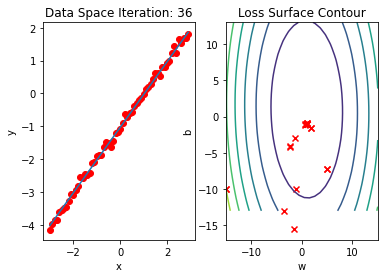

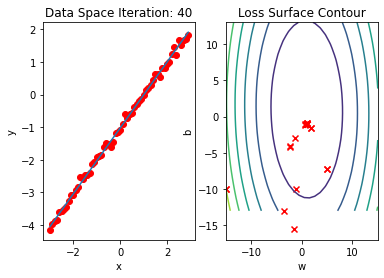

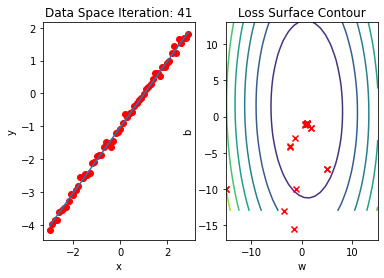

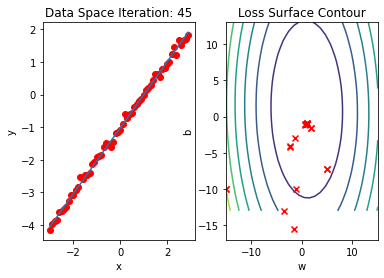

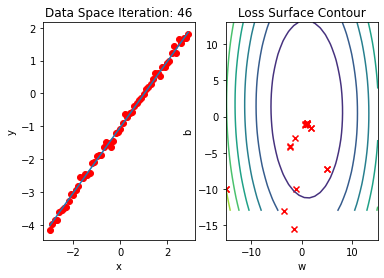

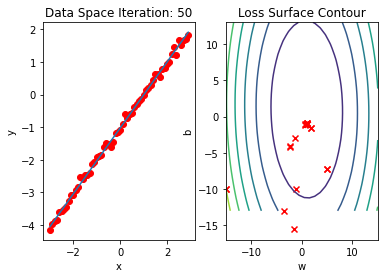



Mini-batch Gradient Descent with 20 batch size




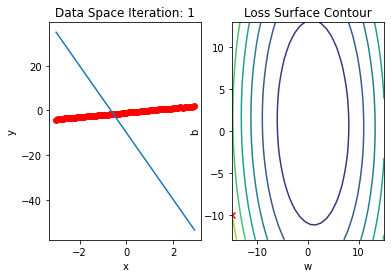

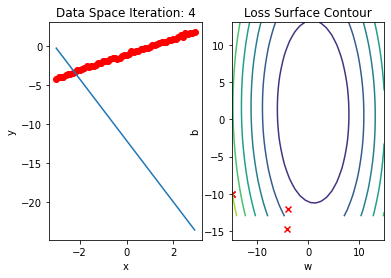

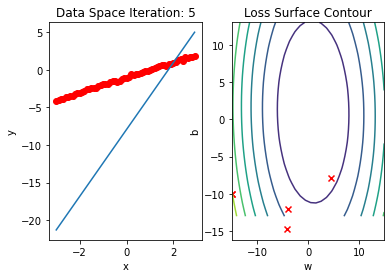

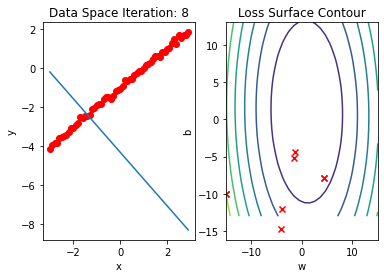

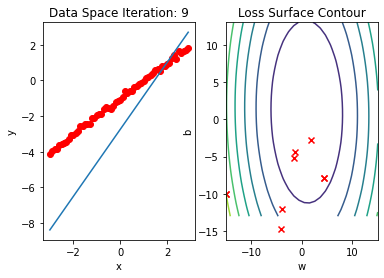

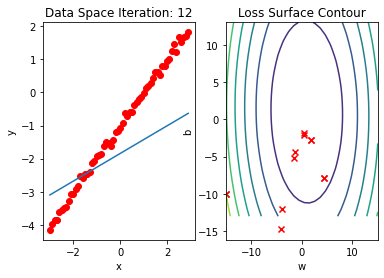

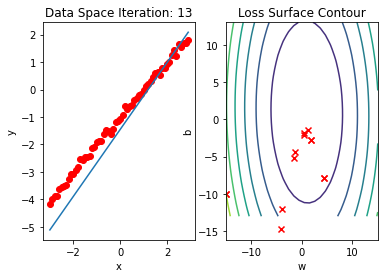

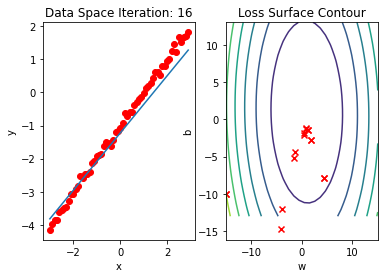

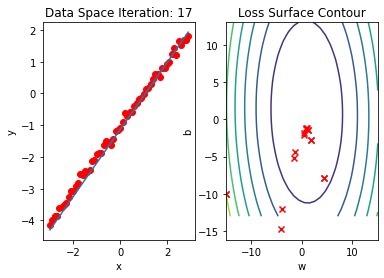

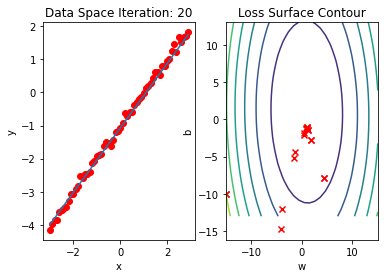

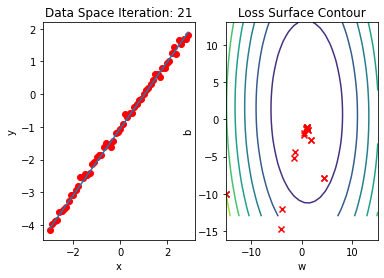

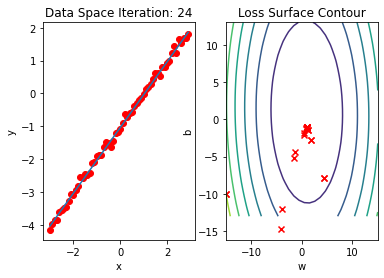

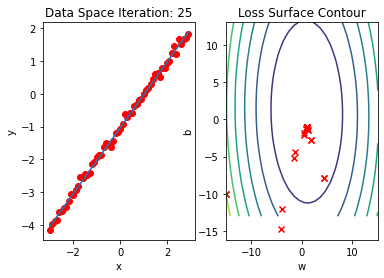

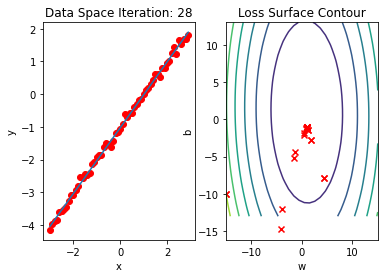

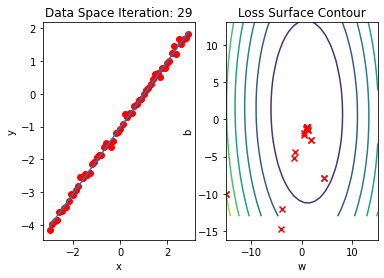

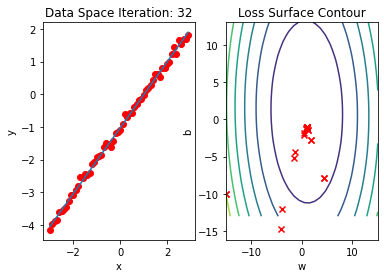

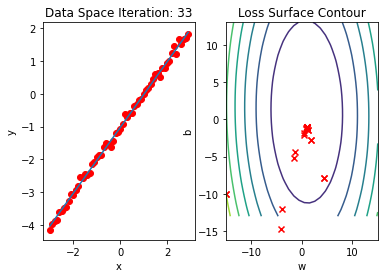

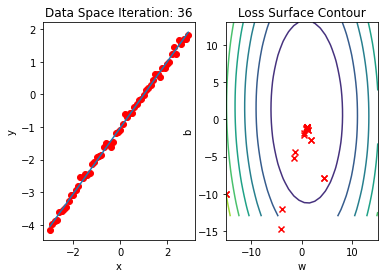

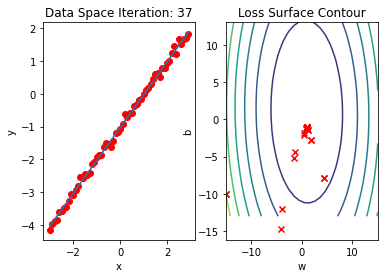

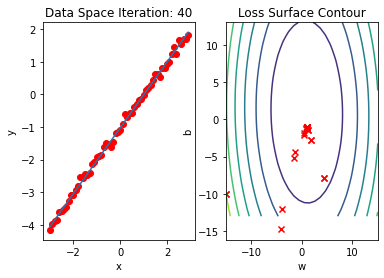



Stochastic Gradient Descent




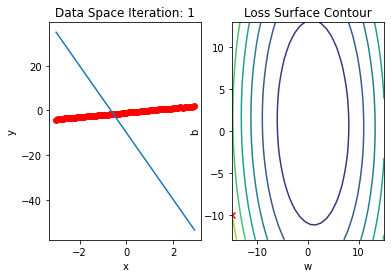

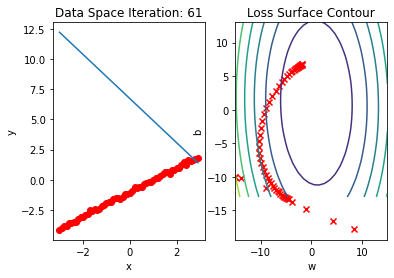

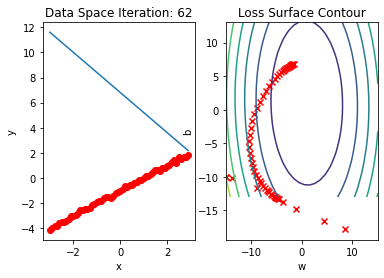

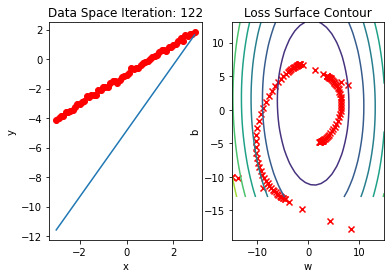

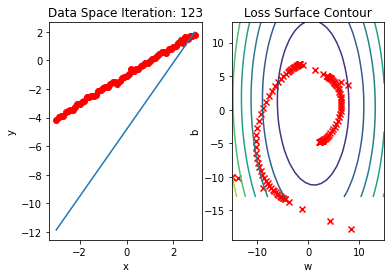

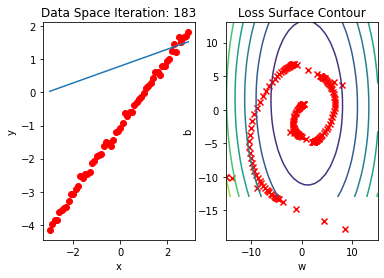

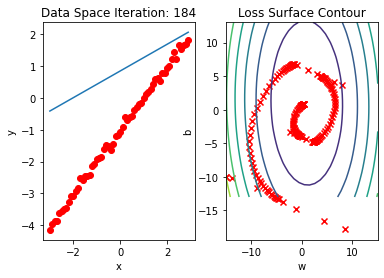

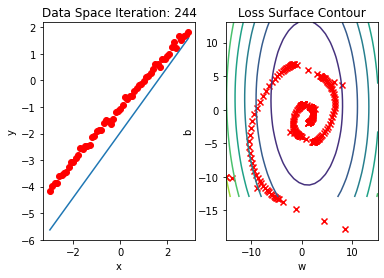

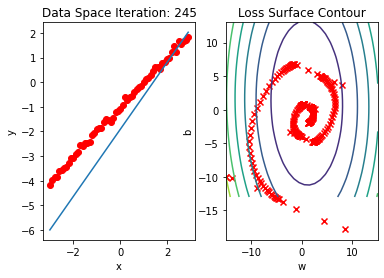

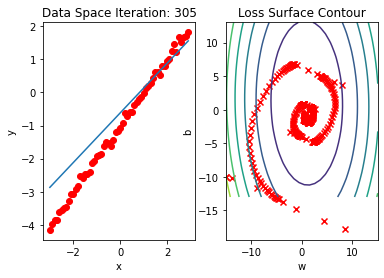

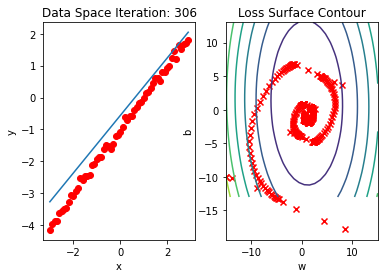

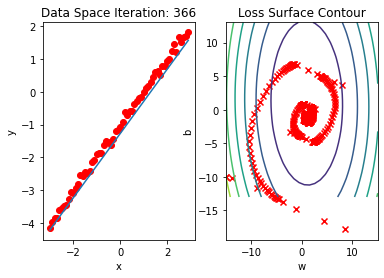

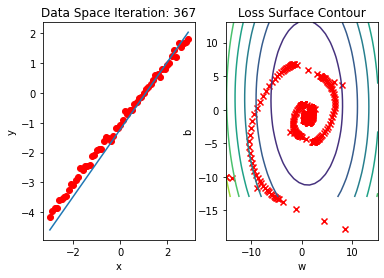

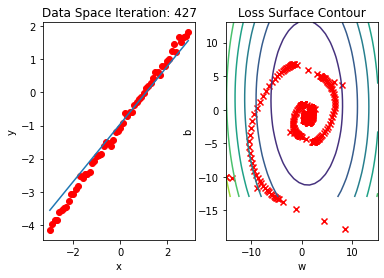

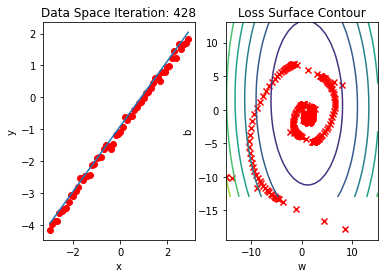

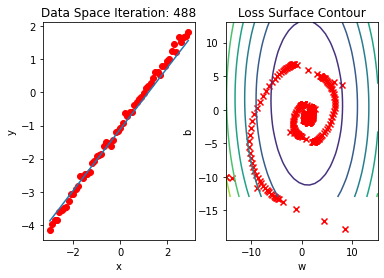

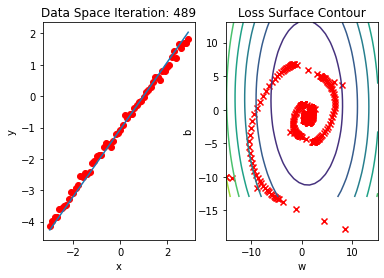

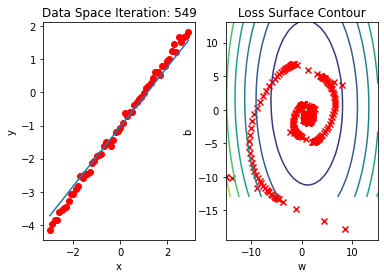

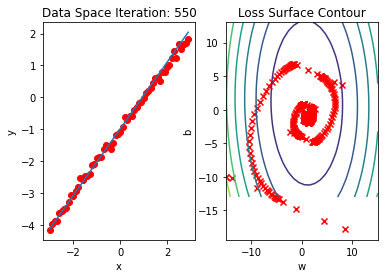

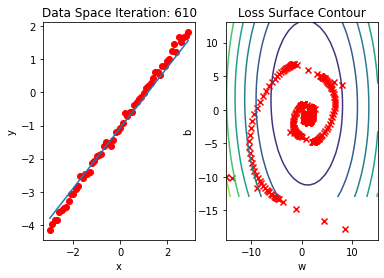

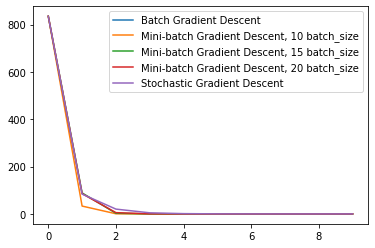

In [16]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from mpl_toolkits import mplot3d

torch.manual_seed(1)
# The class for plotting the diagrams

class plot_error_surfaces(object):
    
    # Constructor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)    
        Z = np.zeros((30, 30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - w2 * self.x + b2) ** 2)
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize = (7.5, 5))
            plt.axes(projection = '3d').plot_surface(self.w, self.b, self.Z, rstride = 1, cstride = 1, cmap = 'viridis', edgecolor = 'none')
            plt.title('Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
            
     # Setter
    def set_para_loss(self, W, B, loss):
        self.n = self.n + 1
        self.W.append(W)
        self.B.append(B)
        self.LOSS.append(loss)
    
    # Plot diagram
    def final_plot(self): 
        ax = plt.axes(projection = '3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W, self.B, self.LOSS, c = 'r', marker = 'x', s = 200, alpha = 1)
        plt.figure()
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
    
    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim()
        plt.plot(self.x, self.y, 'ro', label = "training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label = "estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Data Space Iteration: '+ str(self.n))
        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.title('Loss Surface Contour')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()




class Data(Dataset):
  def __init__(self):
    self.x = torch.arange(-3,3,0.1).view(-1,1)
    self.y = (1 * self.x -1) + 0.1 * torch.randn(self.x.size())
    self.len = self.x.shape[0]

  def __getitem__(self,id):
    return self.x[id] , self.y[id]
  
  def __len__(self):
    return self.len

my_data = Data()

def forward(x):
  return b + w * x

def criterion (yhat,y):
  return torch.mean((yhat-y)** 2)

print("\n\nBatch Gradient Descent (BGD)\n\n")
get_surface = plot_error_surfaces(15, 13, my_data.x, my_data.y, 30)
w = torch.tensor(-15.0, requires_grad=True)
b = torch.tensor(-10.0, requires_grad=True)
lr = 0.1
LOSS_B = []
def b_grad(inter):
  for epoch in range(inter):
    yhat = forward(my_data.x)
    loss = criterion(yhat,my_data.y)
    get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
    get_surface.plot_ps()
    loss.backward()
    w.data = w.data - lr * w.grad.data
    b.data = b.data - lr * b.grad.data
    w.grad.data.zero_()
    b.grad.data.zero_()

b_grad(10)

print("\n\nStochastic Gradient Descent with 10 batch size\n\n")
get_surface = plot_error_surfaces(15, 13, my_data.x, my_data.y, 30, go = False)
w = torch.tensor(-15.0,requires_grad=True)
b = torch.tensor(-10.0,requires_grad=True)
LOSS_S=[]

def s_grad(inter,load_data):
  BIG_LOSS=[]
  for epoch in range(inter):
    yhat = forward(my_data.x)
    BIG_LOSS.append(criterion(yhat,my_data.y).tolist())
    get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), criterion(yhat, my_data.y).tolist())
    get_surface.plot_ps()
    for x,y in load_data:
      Yhat = forward(x)
      loss = criterion(Yhat,y)
      get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
      loss.backward()
      w.data = w.data - lr * w.grad.data
      b.data = b.data - lr * b.grad.data
      w.grad.data.zero_()
      b.grad.data.zero_()
    get_surface.plot_ps()
  return BIG_LOSS

# 10 batch size
trainloader = DataLoader(dataset=my_data, batch_size=10)

LOSS_S_10 = s_grad(10,trainloader)

print("\n\nMini-batch Gradient Descent with 15 batch size\n\n")
get_surface = plot_error_surfaces(15, 13, my_data.x, my_data.y, 30, go = False)
w = torch.tensor(-15.0,requires_grad=True)
b = torch.tensor(-10.0,requires_grad=True)
LOSS_S=[]
# 15 batch size
trainloader = DataLoader(dataset=my_data, batch_size=15)

LOSS_S_15 = s_grad(10,trainloader)


print("\n\nMini-batch Gradient Descent with 20 batch size\n\n")
get_surface = plot_error_surfaces(15, 13, my_data.x, my_data.y, 30, go = False)
w = torch.tensor(-15.0,requires_grad=True)
b = torch.tensor(-10.0,requires_grad=True)
LOSS_S=[]
# 20 batch size
trainloader = DataLoader(dataset=my_data, batch_size=20)

LOSS_S_20 = s_grad(10,trainloader)


print("\n\nStochastic Gradient Descent\n\n")
get_surface = plot_error_surfaces(15, 13, my_data.x, my_data.y, 30, go = False)
w = torch.tensor(-15.0,requires_grad=True)
b = torch.tensor(-10.0,requires_grad=True)
LOSS_S=[]
# 1 batch size
trainloader = DataLoader(dataset=my_data, batch_size=1)

LOSS_S_1 = s_grad(10,trainloader)

plt.plot(LOSS_B, label="Batch Gradient Descent")
plt.plot(LOSS_S_10, label="Mini-batch Gradient Descent, 10 batch_size")
plt.plot(LOSS_S_15, label="Mini-batch Gradient Descent, 15 batch_size")
plt.plot(LOSS_S_20, label="Mini-batch Gradient Descent, 20 batch_size")
plt.plot(LOSS_S_1, label="Stochastic Gradient Descent")
plt.legend()
plt.show()